In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
import helper 

# Makes figures a higher resolution. Better for saving.
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams['savefig.dpi'] = 300

In [2]:
colors = ["#FF0B04", "#F1BE48",
           "#B9975B", "#8B5B29",
           "#524727",
         ]
sns.set_palette(sns.color_palette(colors))

In [17]:
# importing data
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0,low_memory = False)

# # school information
# schools = pd.read_csv('schoolFeatures.csv',index_col = 0)

# data processing
train, test = helper.data_processing_wrapper(housing,
                                               num_to_cat_list = ['MSSubClass','MoSold'],
                                             remove_PID = False
                                        )

housing_no_geo = pd.concat([train,test],axis=0)

# this is where julie needs to help me find that geo impute function :) *fingers crossed~

In [21]:
# importing latlong data
latlong = pd.read_csv('ames_housing_latlong.csv', index_col=0)
latlong_keep = [
    'PID',
    'latitude',
    'longitude'
]
latlong = latlong[latlong_keep]

# merge school feature onto original data set.
housing = housing_no_geo.merge(latlong, how = 'left', left_on = 'PID', right_on = 'PID')
########################
# this is where using that imputed geo file would be good but don't have that for now
########################
housing = housing.dropna(subset=['latitude'])

housing = pd.read_csv('ames_housing_latlong.csv', index_col=0)
loca = housing[(housing['latitude']>=41.9)&(housing['longitude']<=-93.59)]

In [19]:
latlong.columns

Index(['PID', 'latitude', 'longitude'], dtype='object')

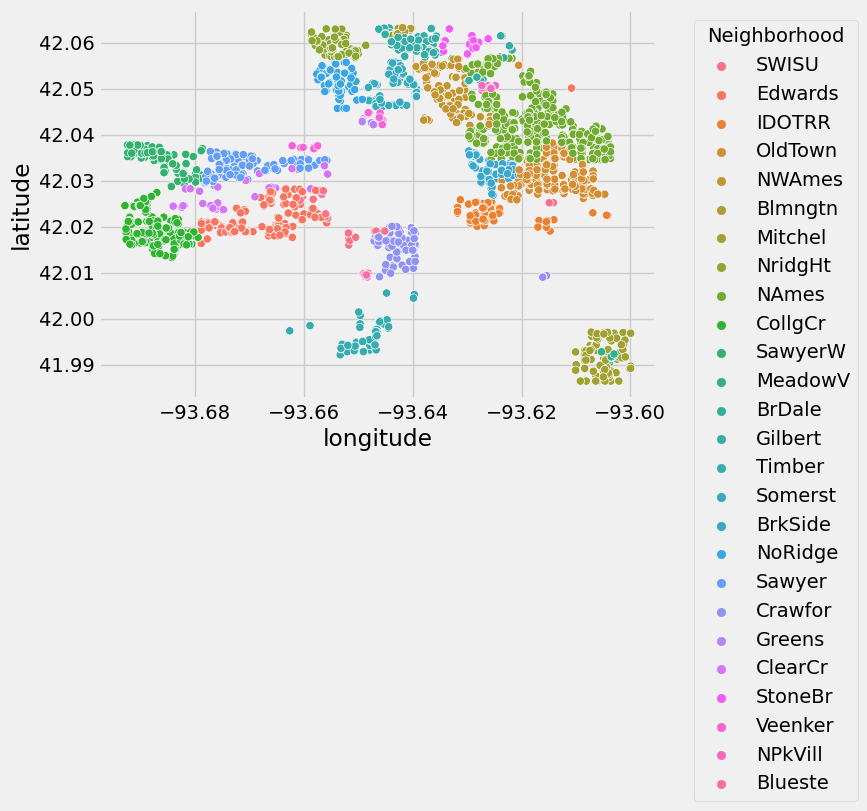

In [22]:
g = sns.scatterplot(data = loca, y = 'latitude',x = 'longitude',hue='Neighborhood')
sns.move_legend(g,loc = "upper left",bbox_to_anchor=(1.05, 1))


plt.show()

In [38]:
nhds = loca.loc[:,['Neighborhood', 'SalePrice']]

In [39]:
nhds = nhds.groupby('Neighborhood').agg(
    Price_med=pd.NamedAgg('SalePrice',np.median)
).fillna(0)

In [40]:
cluster_dict = nhds['Price_med'].to_dict()

In [41]:
loca['Price_med'] = loca.apply(lambda x: cluster_dict[x['Neighborhood']], axis=1)

<ipython-input-41-ed7744f1192e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loca['Price_med'] = loca.apply(lambda x: cluster_dict[x['Neighborhood']], axis=1)


In [89]:
cmap1 = sns.diverging_palette(3, 41.9,  as_cmap=True)

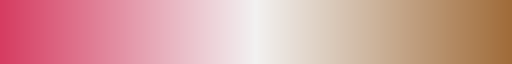

In [90]:
cmap1

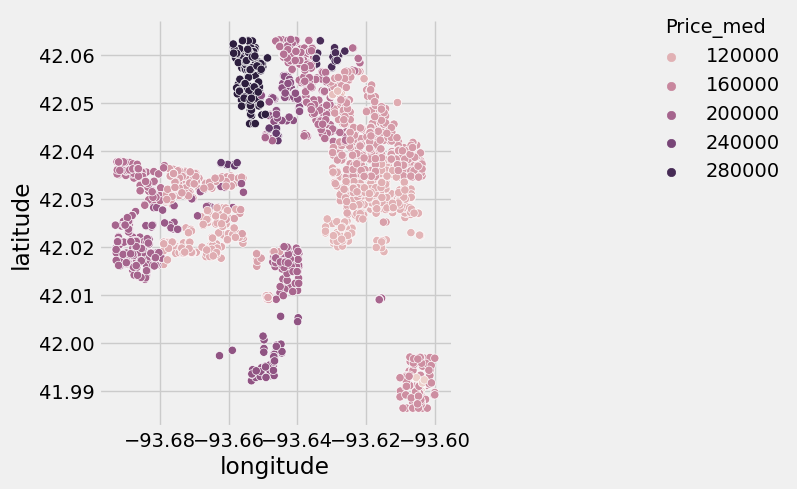

In [92]:
g = sns.relplot(kind = 'scatter',data = loca, y = 'latitude',x = 'longitude',
                hue='Price_med',
#                 palette=cmap1
               )
sns.move_legend(g,loc = "upper left",bbox_to_anchor=(1.05, 1))


plt.show()

<ipython-input-43-6a4268980311>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['SalePrice_bins'] = pd.qcut(graph_df['SalePrice'],


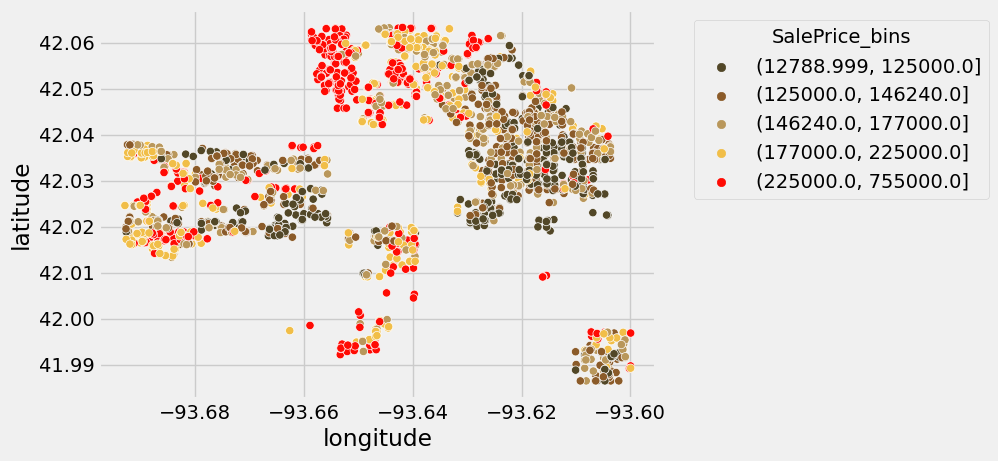

In [43]:
graph_df = loca
graph_df['SalePrice_bins'] = pd.qcut(graph_df['SalePrice'],
                              q=5)

g = sns.scatterplot(data = graph_df, y = 'latitude',x = 'longitude',
                    hue='SalePrice_bins',palette = colors[::-1])
sns.move_legend(g,loc = "upper left",bbox_to_anchor=(1.05, 1))
plt.show()